/media/dominic/Mass Storage/ML_and_DL/Datasets/kaggle_cats_and_dogs/PetImages/Dog/4743.jpg


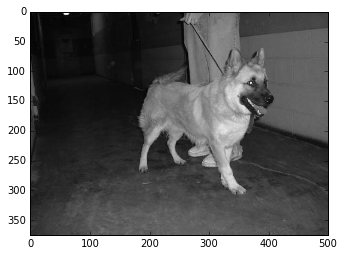

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "/media/dominic/Mass Storage/ML_and_DL/Datasets/kaggle_cats_and_dogs/PetImages"
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # join adds /Dog or /Cat
    for img in os.listdir(path):
        print(os.path.join(path, img)) # this is the full path to the image
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # read the image into an array. Images to grayscale
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [14]:
print(img_array)

[[ 8  9  8 ... 65 66 68]
 [ 7  9  8 ... 61 64 66]
 [ 5  8  9 ... 61 63 65]
 ...
 [56 53 51 ... 67 65 62]
 [57 54 51 ... 66 63 61]
 [59 56 53 ... 65 62 61]]


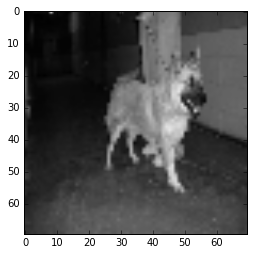

In [15]:
# Need all images to be the same shape (size)

IMG_SIZE = 70 # try every image is 50 by 50

# testing if it looks okay
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [16]:
# create training data
training_data = []

def create_training_data():
    # this method appends all the images in Dog then Cat to the training data
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # join adds /Dog or /Cat
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # read the image into an array. Images to grayscale
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num]) # training data will contain image and num (label)
            except Exception as e:
                pass
            
create_training_data()

In [17]:
print(len(training_data))

24946


In [18]:
import random
# shuffle our dataset
random.shuffle(training_data)

0


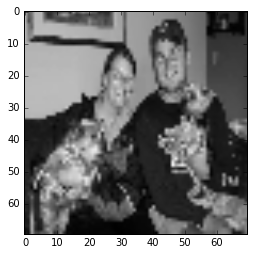

0


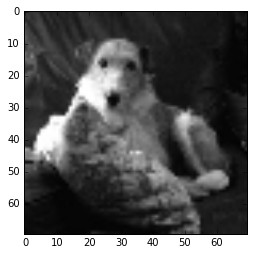

0


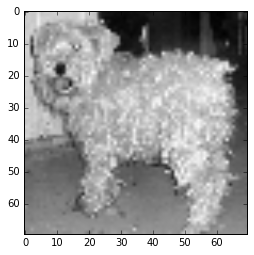

0


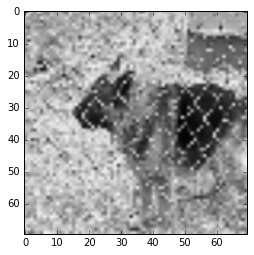

1


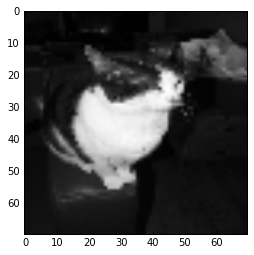

1


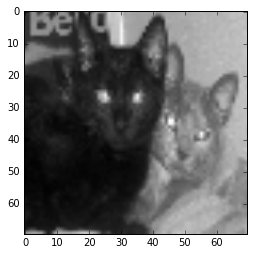

1


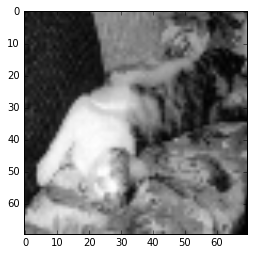

0


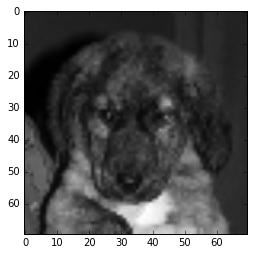

0


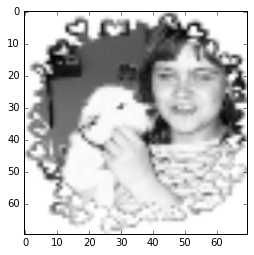

0


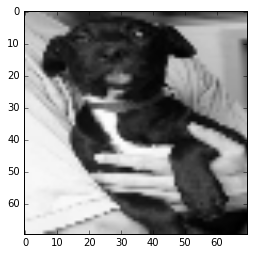

In [19]:
for sample in training_data[:10]:
    print(sample[1]) # sample is a list containing image and label (0 for dog, 1 for cat)
    plt.imshow(sample[0], cmap="gray")
    plt.show()

In [20]:
# after data is shuffled, pack into X(feature set) and y(labels)
X = []
y = []

In [21]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
# x has to be a numpy array
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [22]:
# save our data
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [23]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [24]:
# X is now a list of images (np arrays) and y is a list of labels (0 or 1)
print(type(X[0]))
# imgplot = plt.imshow(X[0]) # doesnt work for some reason...

<class 'numpy.ndarray'>
